Model trained successfully!

CLASS TASK: CONFUSION MATRIX & ROC CURVE

Confusion Matrix:
[[  9   6]
 [  9 106]]

Explanation:
The confusion matrix shows how many students were correctly and incorrectly classified.
[Top-left = True Negatives, Top-right = False Positives, Bottom-left = False Negatives, Bottom-right = True Positives]



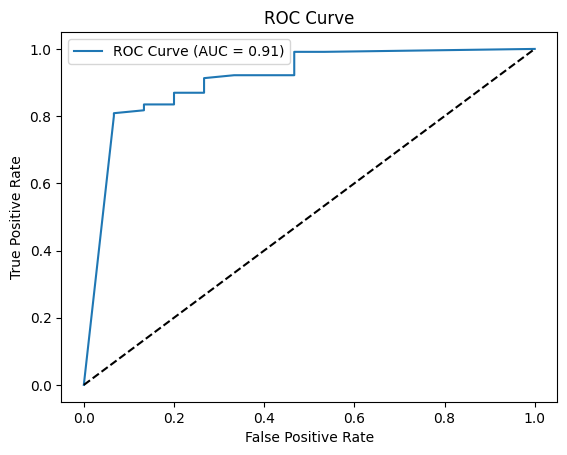

ROC Curve Explanation:
ROC curve shows how well the model separates Pass vs Fail.
AUC (Area Under Curve) close to 1 means better performance.

ASSIGNMENT 7: EVALUATING MODEL PERFORMANCE

Precision: 0.95
Recall: 0.92
F1 Score: 0.93

Explanation of Metrics:
Precision: Out of all students predicted as Pass, how many actually passed.
Recall: Out of all students who actually passed, how many we correctly predicted.
F1 Score: The balance between Precision and Recall (higher = better).


PROJECT MILESTONE: FINAL EVALUATION METRIC

Reflection:
In this student performance project, **Recall** is the most important metric.
Reason: We want to correctly identify as many students as possible who might pass or fail.
Missing a student who is likely to fail (low recall) means they won’t get help early.
So, Recall helps ensure we catch most failing students and can take action early.



In [3]:
# -----------------------------
# WEEK 7: MODEL EVALUATION
# Dataset: students.csv
# -----------------------------

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv('/content/students.csv', sep=';')

# Step 3: Prepare data for classification
# Let's predict if a student PASSES (1) or FAILS (0) based on final grade (G3)
df['Pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# We'll use G1, G2, and studytime as input features
X = df[['G1', 'G2', 'studytime']]
y = df['Pass']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model trained successfully!\n")

# -----------------------------
# CLASS TASK: CONFUSION MATRIX & ROC CURVE
# -----------------------------
print("CLASS TASK: CONFUSION MATRIX & ROC CURVE\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nExplanation:")
print("The confusion matrix shows how many students were correctly and incorrectly classified.")
print("[Top-left = True Negatives, Top-right = False Positives, Bottom-left = False Negatives, Bottom-right = True Positives]\n")

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC Curve Explanation:")
print("ROC curve shows how well the model separates Pass vs Fail.")
print("AUC (Area Under Curve) close to 1 means better performance.\n")

# -----------------------------
# ASSIGNMENT 7: MODEL EVALUATION METRICS
# -----------------------------
print("ASSIGNMENT 7: EVALUATING MODEL PERFORMANCE\n")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))
print("\nExplanation of Metrics:")
print("Precision: Out of all students predicted as Pass, how many actually passed.")
print("Recall: Out of all students who actually passed, how many we correctly predicted.")
print("F1 Score: The balance between Precision and Recall (higher = better).")
print("\n")

# -----------------------------
# PROJECT MILESTONE & REFLECTION
# -----------------------------
print("PROJECT MILESTONE: FINAL EVALUATION METRIC\n")

print("Reflection:")
print("In this student performance project, **Recall** is the most important metric.")
print("Reason: We want to correctly identify as many students as possible who might pass or fail.")
print("Missing a student who is likely to fail (low recall) means they won’t get help early.")
print("So, Recall helps ensure we catch most failing students and can take action early.\n")

